# Parameter Estimation for Step1 Energy Model

In [1]:
import petab
import fides
import os
import libsbml
import amici
import amici.petab_simulate
import matplotlib.pyplot as plt
import pypesto
import pypesto.optimize as optimize
import pypesto.petab
import petab.visualize
import pypesto.visualize as visualize
from petab.visualize import plot_data_and_simulation
from petab.visualize import plot_petab_problem
import importlib
import sys

In [8]:
# import to petab
petab_problem = petab.Problem.from_yaml(
    
   "EGFR_Allparameters/EGFR.yaml"    #state the exact folder contains the yaml file
)
importer = pypesto.petab.PetabImporter(petab_problem)
# import to pypesto
problem = importer.create_problem()
model = importer.create_model(verbose=False)


Using existing amici model in folder /home/zarifeh/Downloads/Energy Modeling/Correction_PE/amici_models/Step1.
Using existing amici model in folder /home/zarifeh/Downloads/Energy Modeling/Correction_PE/amici_models/Step1.


In [9]:

# create optimizer object which contains all information for doing the optimization
options = {'maxiter':2000}
optimizer = optimize.FidesOptimizer(options=options)
#optimizer = optimize.PyswarmOptimizer(options=options)
#optimizer = optimize.ScipyOptimizer()
#engine = pypesto.engine.SingleCoreEngine()
engine = pypesto.engine.MultiProcessEngine()

# do the optimization
result = optimize.minimize(
    problem=problem, optimizer=optimizer, n_starts=50, engine=engine
)


Engine set up to use up to 8 processes in total. The number was automatically determined and might not be appropriate on some systems.
Performing parallel task execution on 8 processes.
  0%|          | 0/50 [00:00<?, ?it/s]Using existing amici model in folder /home/zarifeh/Downloads/Energy Modeling/Correction_PE/amici_models/Step1.
Using existing amici model in folder /home/zarifeh/Downloads/Energy Modeling/Correction_PE/amici_models/Step1.
Using existing amici model in folder /home/zarifeh/Downloads/Energy Modeling/Correction_PE/amici_models/Step1.
Using existing amici model in folder /home/zarifeh/Downloads/Energy Modeling/Correction_PE/amici_models/Step1.
Using existing amici model in folder /home/zarifeh/Downloads/Energy Modeling/Correction_PE/amici_models/Step1.
Using existing amici model in folder /home/zarifeh/Downloads/Energy Modeling/Correction_PE/amici_models/Step1.
Using existing amici model in folder /home/zarifeh/Downloads/Energy Modeling/Correction_PE/amici_models/Step1.

# Visualization

<AxesSubplot:title={'center':'Estimated parameters'}, xlabel='Parameter value', ylabel='Parameter'>

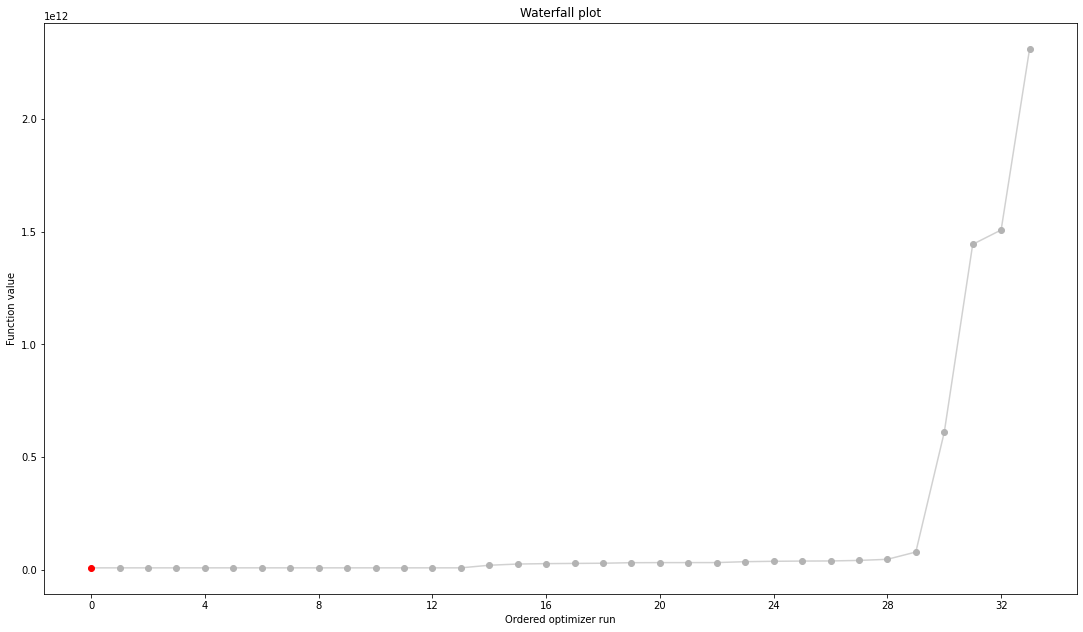

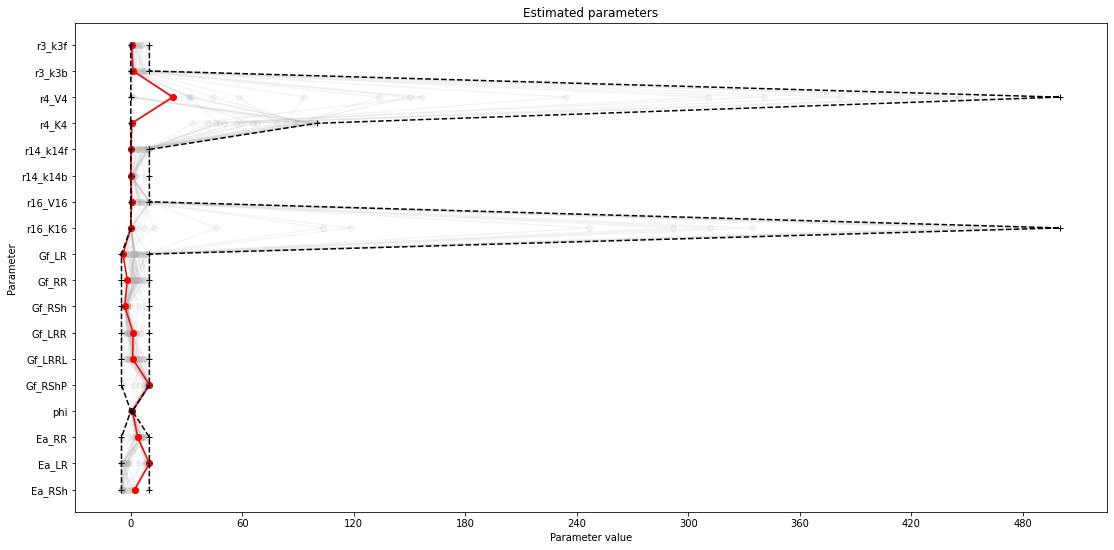

In [10]:
visualize.waterfall(result, scale_y="lin")
visualize.parameters(result)

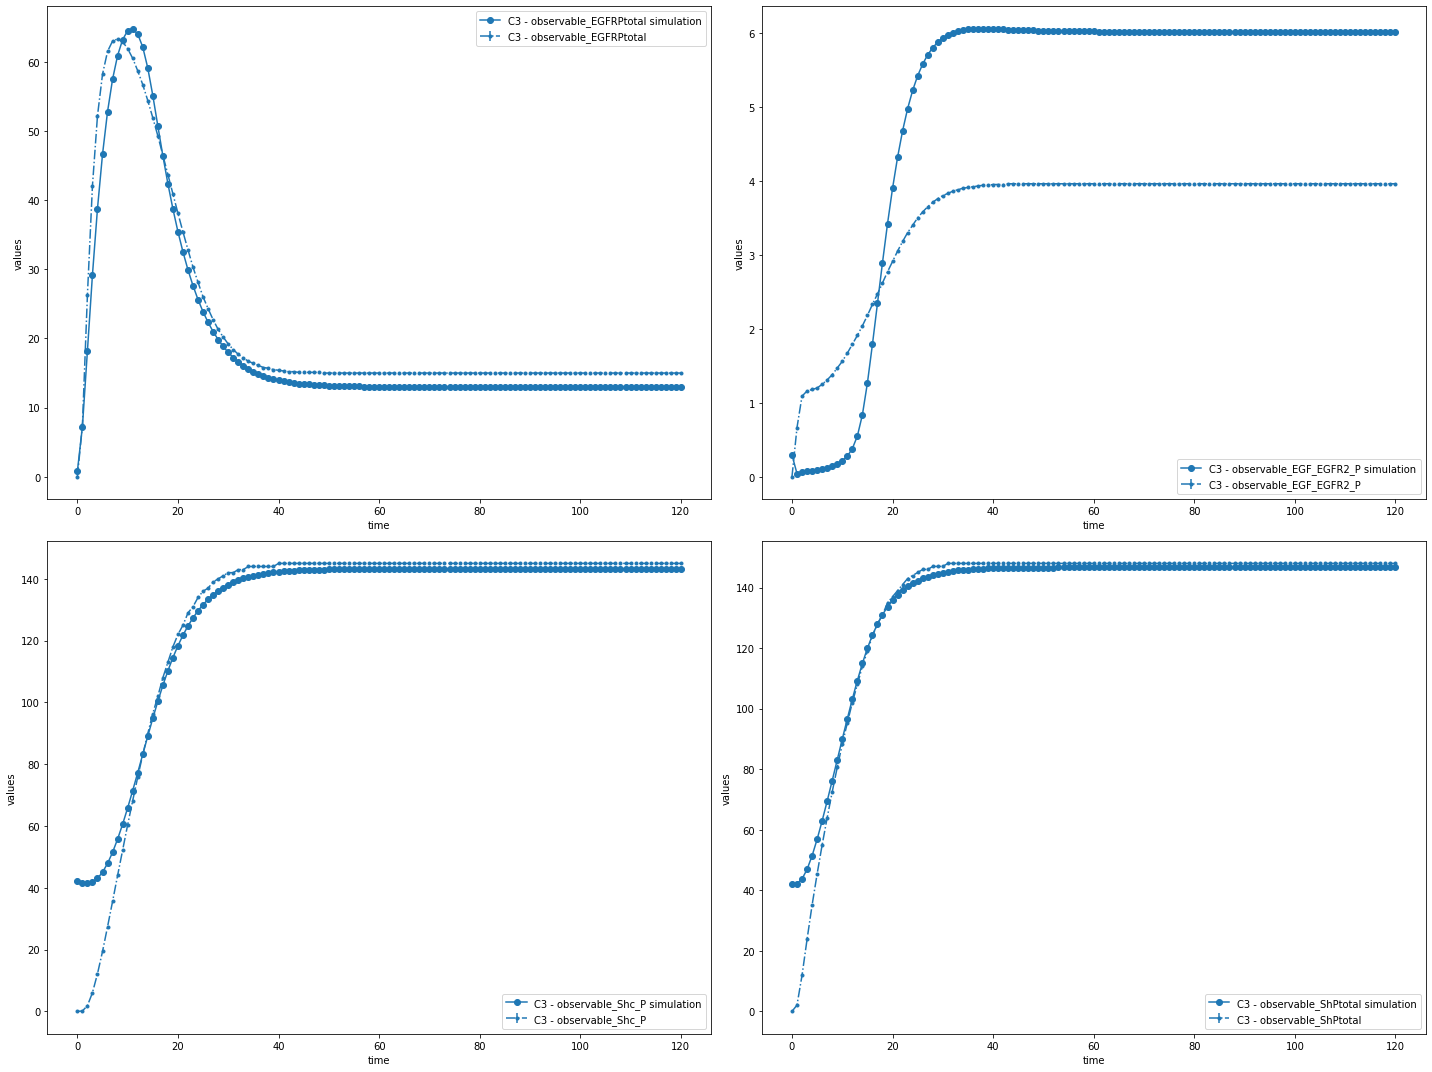

In [11]:
from pypesto.visualize.model_fit import visualize_optimized_model_fit

pp1=visualize_optimized_model_fit(petab_problem=petab_problem, result=result)

In [12]:
def get_x_mle(optimize_result, pypesto_problem, petab_problem, scaled=True):
    if not scaled:
        scaling = petab.parameters.get_optimization_parameter_scaling(
            petab_problem.parameter_df
        )
    return {
        x_id: (
            petab.parameters.unscale(x_value, scaling[x_id])
            if not scaled
            else x_value
        )
        for x_id, x_value in zip(
            pypesto_problem.x_names, optimize_result.list[0]["x"]
        )
        # if x_id in scaling
    }
x_mle_unscaled_original = get_x_mle(
    result.optimize_result,
    problem,
    petab_problem,
    scaled=False,
)
print("Parameters are estimated to be (linear scale):")
print(
    "\n".join(
        [
            f"{x_id}: {x_value}"
            for x_id, x_value in x_mle_unscaled_original.items()
        ]
    )
)

import libsbml

converter_config = libsbml.SBMLLocalParameterConverter().getDefaultProperties()
petab_problem.sbml_document.convert(converter_config)

obj = importer.create_objective()
ref = visualize.create_references(
    x=petab_problem.x_nominal_scaled, fval=obj(petab_problem.x_nominal_scaled)
)


Using existing amici model in folder /home/zarifeh/Downloads/Energy Modeling/Correction_PE/amici_models/Step1.


Parameters are estimated to be (linear scale):
r3_k3f: 0.42529631607970714
r3_k3b: 1.2185326780004162
r4_V4: 22.73588168524032
r4_K4: 0.48712828908760314
r14_k14f: 0.18199416480141842
r14_k14b: 0.0010000000000004103
r16_V16: 0.45192116886438444
r16_K16: 0.0010000000000004105
Gf_LR: -4.211023838691635
Gf_RR: -1.8595014667459981
Gf_RSh: -3.2837447098596164
Gf_LRR: 1.2532420110157294
Gf_LRRL: 1.0304353339718078
Gf_RShP: 9.999999999999993
phi: 0.8999999999999787
Ea_RR: 3.722046476894144
Ea_LR: 9.999996578776654
Ea_RSh: 2.06529968133894


[Warning] AMICI:NaN: AMICI encountered a NaN value for xdot[0] (S1)
[Warning] AMICI:NaN: AMICI encountered a NaN value for p[10]!
[Warning] AMICI:NaN: AMICI encountered a NaN value for w[9]!
[Warning] AMICI:CVODES:CVode:OTHER: AMICI ERROR: in module CVODES in function CVode : The right-hand side routine failed at the first call. 
[Warning] AMICI:simulation: AMICI forward simulation failed at t = 0.000000:
AMICI failed to integrate the forward problem

